# 1.뉴스 데이터를 통한 LDA 분석 (gensim)
- 사이킷런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터를 제공

## 1.필요 모듈 로드

In [1]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups 
import nltk 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
from gensim import corpora 
import gensim 

## 2.데이터 로드

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data 
print('샘플 수: ', len(documents))

샘플 수:  11314


In [3]:
print(type(documents))
documents[0]

<class 'list'>


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [4]:
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## 3.데이터 전처리
  1. 대문자->소문자
  2. 구두점, 숫자, 특수 문자 제거
  3. 짧은 단어 제거

- [^a-zA-Z] : 영문자를 제외한 모든 문자
- regrex=True : 함수에서 이 패턴을 정규 표현식으로 처리
- ' '.join([w for w in x.split() if len(w)>3]) : 데이터를 순회하면서 공백으로 단어를 나누고 길이가 3이상인 단어들을 리스트로 반환하고 join 함수를 통해서 한 줄의 텍스트로 병합

In [5]:
news_df = pd.DataFrame({'documents': documents})

# 특수문자 제거 
news_df['clean_doc'] = news_df['documents'].str.replace("[^a-zA-Z]", " ", regex=True)

# 길이가 3이하인 단어는 제거 (길이가 너무 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# 전체 단어에 대한 소문자 변환 
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [6]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

- 불용어 제거

In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/yoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = stopwords.words('english')

tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(type(tokenized_doc))

<class 'pandas.core.series.Series'>


In [9]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


## 4.TF-IDF 벡터화 / 단어 집합 생성

In [10]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

- 단어를 (word_id, word_frequency)의 형태로 변경
- corpora.Dictionary

In [11]:
# Gensim의 사전 객체 생성
dictionary = corpora.Dictionary(tokenized_doc)
print(dict(dictionary))
print(len(dictionary))

{0: 'acts', 1: 'atrocities', 2: 'austria', 3: 'away', 4: 'biased', 5: 'blessing', 6: 'clearly', 7: 'commited', 8: 'daily', 9: 'degree', 10: 'described', 11: 'disagree', 12: 'europe', 13: 'europeans', 14: 'existance', 15: 'government', 16: 'guilt', 17: 'holocaust', 18: 'ignore', 19: 'incidences', 20: 'inhuman', 21: 'israeli', 22: 'israels', 23: 'jews', 24: 'least', 25: 'letter', 26: 'lived', 27: 'look', 28: 'makes', 29: 'media', 30: 'might', 31: 'occured', 32: 'power', 33: 'races', 34: 'realize', 35: 'reason', 36: 'received', 37: 'rediculous', 38: 'report', 39: 'reports', 40: 'reputation', 41: 'ruin', 42: 'seem', 43: 'shame', 44: 'soldiers', 45: 'statement', 46: 'story', 47: 'subsidizing', 48: 'sure', 49: 'think', 50: 'treating', 51: 'unfortunate', 52: 'well', 53: 'whole', 54: 'world', 55: 'accept', 56: 'actually', 57: 'anyway', 58: 'atheism', 59: 'atheist', 60: 'bake', 61: 'bummin', 62: 'chewables', 63: 'denial', 64: 'ever', 65: 'expect', 66: 'faith', 67: 'feelings', 68: 'flintstone', 

In [12]:
# 각 문서를 BOW로 벡터화 (id,빈도) -> tfidf 입력값으로 쓰기 위함 
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[0]) # BoW(단어 출현 빈도 벡터)로 생성한 말뭉치 

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)]


In [13]:
# TF-IDF 모델 생성 및 적용
tfidf_model = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]
print(type(corpus_tfidf))
corpus_tfidf

<class 'gensim.interfaces.TransformedCorpus'>


In [14]:
# 첫 번째 문서의 TF-IDF 값 출력
for doc in corpus_tfidf: 
    print(doc)
    break


[(0, 0.10446692674067354), (1, 0.13558213137308087), (2, 0.14434215372971784), (3, 0.07073840035096603), (4, 0.1234056457935497), (5, 0.16122249595148677), (6, 0.09071825708782637), (7, 0.15472346190963865), (8, 0.11332356091526447), (9, 0.10971241427650162), (10, 0.09987813110402272), (11, 0.10446692674067354), (12, 0.10446692674067354), (13, 0.14002601933520387), (14, 0.13640371387724595), (15, 0.06831251328212742), (16, 0.13558213137308087), (17, 0.12928570881491439), (18, 0.11076334929884003), (19, 0.18604127802572756), (20, 0.163883335925835), (21, 0.20179489633197004), (22, 0.3490024030894737), (23, 0.0913926662441089), (24, 0.06133593577277211), (25, 0.09796789269882543), (26, 0.10406350478809986), (27, 0.06044873947321144), (28, 0.07205658425143537), (29, 0.38370409497984254), (30, 0.05703685566767836), (31, 0.13256551980974607), (32, 0.06672652683844095), (33, 0.14318338542864792), (34, 0.09634829826393018), (35, 0.06936344830446585), (36, 0.09162201876228224), (37, 0.17450120

In [15]:
doc

[(0, 0.10446692674067354),
 (1, 0.13558213137308087),
 (2, 0.14434215372971784),
 (3, 0.07073840035096603),
 (4, 0.1234056457935497),
 (5, 0.16122249595148677),
 (6, 0.09071825708782637),
 (7, 0.15472346190963865),
 (8, 0.11332356091526447),
 (9, 0.10971241427650162),
 (10, 0.09987813110402272),
 (11, 0.10446692674067354),
 (12, 0.10446692674067354),
 (13, 0.14002601933520387),
 (14, 0.13640371387724595),
 (15, 0.06831251328212742),
 (16, 0.13558213137308087),
 (17, 0.12928570881491439),
 (18, 0.11076334929884003),
 (19, 0.18604127802572756),
 (20, 0.163883335925835),
 (21, 0.20179489633197004),
 (22, 0.3490024030894737),
 (23, 0.0913926662441089),
 (24, 0.06133593577277211),
 (25, 0.09796789269882543),
 (26, 0.10406350478809986),
 (27, 0.06044873947321144),
 (28, 0.07205658425143537),
 (29, 0.38370409497984254),
 (30, 0.05703685566767836),
 (31, 0.13256551980974607),
 (32, 0.06672652683844095),
 (33, 0.14318338542864792),
 (34, 0.09634829826393018),
 (35, 0.06936344830446585),
 (36, 0

In [16]:
# doc = 첫 번째 문서 
for idx, value in doc:
    print(f"단어: {dictionary[idx]}, TF-IDF값: {value}")

단어: acts, TF-IDF값: 0.10446692674067354
단어: atrocities, TF-IDF값: 0.13558213137308087
단어: austria, TF-IDF값: 0.14434215372971784
단어: away, TF-IDF값: 0.07073840035096603
단어: biased, TF-IDF값: 0.1234056457935497
단어: blessing, TF-IDF값: 0.16122249595148677
단어: clearly, TF-IDF값: 0.09071825708782637
단어: commited, TF-IDF값: 0.15472346190963865
단어: daily, TF-IDF값: 0.11332356091526447
단어: degree, TF-IDF값: 0.10971241427650162
단어: described, TF-IDF값: 0.09987813110402272
단어: disagree, TF-IDF값: 0.10446692674067354
단어: europe, TF-IDF값: 0.10446692674067354
단어: europeans, TF-IDF값: 0.14002601933520387
단어: existance, TF-IDF값: 0.13640371387724595
단어: government, TF-IDF값: 0.06831251328212742
단어: guilt, TF-IDF값: 0.13558213137308087
단어: holocaust, TF-IDF값: 0.12928570881491439
단어: ignore, TF-IDF값: 0.11076334929884003
단어: incidences, TF-IDF값: 0.18604127802572756
단어: inhuman, TF-IDF값: 0.163883335925835
단어: israeli, TF-IDF값: 0.20179489633197004
단어: israels, TF-IDF값: 0.3490024030894737
단어: jews, TF-IDF값: 0.09139266624

## 5.LDA 모델 학습

- corpus_tfidf
  - LDA 모델에 입력되는 문서 코퍼스. 이 코퍼스는 TF-IDF 값으로 변환된 문서들의 리스트이며, 각 문서는 (단어 인덱스, TF-IDF 값)의 튜플로 이루어져 있음. 즉, Bag of Words (BOW)가 아닌 TF-IDF 기반으로 벡터화된 문서들이 LDA 모델에 입력됨.

- num_topics=NUM_TOPICS
  - LDA 모델이 추출할 토픽의 개수를 설정하는 파라미터. 예를 들어, 20개의 토픽을 추출하려면 NUM_TOPICS=20으로 설정하면 됨.


- id2word=dictionary
  - 단어 ID와 실제 단어 사이의 매핑을 정의한 사전. 이 사전은 Gensim의 corpora.Dictionary 객체로, 각 단어에 대해 고유한 인덱스를 부여하고 이를 토픽 모델링에서 참조.
  - LDA 모델은 BOW 또는 TF-IDF와 같은 방식으로 단어 인덱스를 다루기 때문에, 이를 사람이 읽을 수 있는 실제 단어로 변환할 때 id2word가 필요.

- passes=15
  - 모델이 전체 코퍼스를 몇 번 반복하여 학습할 것인지를 정의하는 인자입니다. 여기서는 15번 반복 학습을 수행. 이 값이 높을수록 모델이 데이터에 더 많이 적응하게 되지만, 지나치게 높은 값은 오버피팅의 위험을 초래할 수 있음.
  - passes 값은 모델의 수렴 속도나 정확도에 영향을 미칩니다

        - ldamodel_tfidf = gensim.models.ldamodel.LdaModel(
            corpus_tfidf,                 # 입력 데이터 (TF-IDF 기반 코퍼스)
            num_topics=NUM_TOPICS,        # 토픽 개수
            id2word=dictionary,           # 단어 사전
            passes=15,                    # 전체 데이터셋 반복 횟수
            iterations=400,               # 각 문서에서 반복하는 샘플링 횟수
            alpha='auto',                 # Alpha 하이퍼파라미터 (symmetric, asymmetric, auto)
            eta='auto',                   # Beta (Eta) 하이퍼파라미터 (symmetric 또는 auto)
            random_state=42,              # 난수 시드 (재현성 확보)
            chunksize=2000,               # 한 번에 처리할 문서 수
            update_every=1,               # 모델을 얼마나 자주 업데이트할지 (1: 각 문서마다 업데이트)
            minimum_probability=0.01,     # 출력할 주제의 최소 확률
            per_word_topics=True          # 각 단어에 대해 주제를 할당할지 여부
        )

In [17]:
# LDA 모델 적용 (TF-IDF 기반)
NUM_TOPICS = 20 
ldamodel_tfidf = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)
topics_tfidf = ldamodel_tfidf.print_topics(num_words=4)

In [19]:
# 토픽 출력 (20개)
# 튜플 첫 번째 요소: 토픽 번호 (학습된 토픽 중에서 번호를 매긴 것)
# 0.200*"word" : 특정 단어와 해당 단어의 가중치 
print(type(topics_tfidf))
for topic in topics_tfidf:
    print(topic)

<class 'list'>
(0, '0.004*"surrender" + 0.004*"pitt" + 0.003*"skepticism" + 0.003*"cadre"')
(1, '0.002*"pictures" + 0.002*"candida" + 0.001*"patent" + 0.001*"harddisk"')
(2, '0.003*"detroit" + 0.002*"toronto" + 0.002*"leafs" + 0.002*"minnesota"')
(3, '0.003*"sale" + 0.003*"working" + 0.003*"asking" + 0.003*"side"')
(4, '0.002*"tiff" + 0.002*"directory" + 0.002*"jpeg" + 0.002*"baud"')
(5, '0.002*"clemens" + 0.002*"marriage" + 0.001*"catbyte" + 0.001*"dtmedin"')
(6, '0.003*"adam" + 0.002*"toshiba" + 0.002*"deletion" + 0.002*"keith"')
(7, '0.002*"novell" + 0.001*"trace" + 0.001*"kidding" + 0.001*"jagr"')
(8, '0.002*"polygon" + 0.002*"devils" + 0.002*"wiretap" + 0.002*"pitcher"')
(9, '0.004*"font" + 0.003*"widget" + 0.003*"fonts" + 0.002*"eisa"')
(10, '0.006*"space" + 0.004*"players" + 0.004*"nasa" + 0.003*"league"')
(11, '0.004*"motherboard" + 0.004*"simms" + 0.003*"input" + 0.003*"output"')
(12, '0.002*"utility" + 0.002*"crash" + 0.002*"dial" + 0.002*"spirit"')
(13, '0.002*"warrant" + 0.

- print_topics():
  - 여러 토픽을 한 번에 출력하고, 각 토픽을 문자열 형식으로 제공.
  - 주로 전체 토픽 요약을 보고 싶을 때 유용.
- show_topic(t, num_words):
  - 특정 토픽에 대해 단어와 가중치를 리스트 형태로 반환.
  - 주로 특정 토픽의 세부 정보를 얻고, 그 데이터를 직접 활용할 때 유용.

In [20]:
ldamodel_tfidf.print_topics(num_words=2)

[(0, '0.004*"surrender" + 0.004*"pitt"'),
 (1, '0.002*"pictures" + 0.002*"candida"'),
 (2, '0.003*"detroit" + 0.002*"toronto"'),
 (3, '0.003*"sale" + 0.003*"working"'),
 (4, '0.002*"tiff" + 0.002*"directory"'),
 (5, '0.002*"clemens" + 0.002*"marriage"'),
 (6, '0.003*"adam" + 0.002*"toshiba"'),
 (7, '0.002*"novell" + 0.001*"trace"'),
 (8, '0.002*"polygon" + 0.002*"devils"'),
 (9, '0.004*"font" + 0.003*"widget"'),
 (10, '0.006*"space" + 0.004*"players"'),
 (11, '0.004*"motherboard" + 0.004*"simms"'),
 (12, '0.002*"utility" + 0.002*"crash"'),
 (13, '0.002*"warrant" + 0.002*"cubs"'),
 (14, '0.003*"kent" + 0.002*"wire"'),
 (15, '0.002*"scores" + 0.002*"review"'),
 (16, '0.004*"would" + 0.003*"like"'),
 (17, '0.001*"viewer" + 0.001*"tigers"'),
 (18, '0.001*"asshole" + 0.001*"faces"'),
 (19, '0.002*"apps" + 0.002*"liar"')]

In [21]:
topic_number = 0
topic_topn = 4 

ldamodel_tfidf.show_topic(topic_number, topic_topn)

[('surrender', 0.0037060603),
 ('pitt', 0.0035143818),
 ('skepticism', 0.0033944244),
 ('cadre', 0.0033934799)]

## 6.시각화

### 1.pyLDAvis

In [22]:
# ! pip install pyLDAvis
# !pip install pyLDAvis --upgrade

- import pyLDAvis.gensim_models
  - PyLDAvis는 Gensim 모델과 쉽게 통합할 수 있도록 gensim_models 모듈을 제공. 이를 통해 Gensim에서 학습한 LDA 모델의 결과를 시각화할 수 있음.

- pyLDAvis.enable_notebook():
  - Jupyter Notebook 환경에서 PyLDAvis의 시각화가 제대로 동작하도록 해주는 설정. 이 코드는 노트북 내부에서 그래프가 렌더링되도록 활성화.

- vis_tfidf = pyLDAvis.gensim_models.prepare(ldamodel_tfidf, corpus_tfidf, dictionary):
  - **pyLDAvis.gensim_models.prepare**는 Gensim의 LDA 모델을 PyLDAvis 시각화를 위한 형식으로 준비하는 함수.
  - 이 함수는 다음과 같은 매개변수를 사용합니다: \
        - ldamodel_tfidf: 학습된 LDA 모델입니다. \
        - corpus_tfidf: TF-IDF로 변환된 문서 코퍼스입니다. \
        - dictionary: 단어와 인덱스를 매핑하는 사전입니다.

- pyLDAvis.display(vis_tfidf):
  준비된 시각화 결과를 Jupyter Notebook에서 출력. 출력 결과는 각 토픽의 상관관계와 토픽을 구성하는 중요한 단어들을 시각적으로 확인할 수 있는 인터페이스.
- 단어 선택 기준:
  - λ(람다) = 1일 때:
    - 순수하게 단어의 빈도를 기반으로 가장 중요한 단어들이 선택. 즉, 해당 단어가 전체 데이터셋에서 많이 등장하는 정도를 기준으로 중요한 단어를 결정.
    - 예를 들어, "the", "and", "is"와 같은 단어는 전체적으로 많이 등장하기 때문에 높은 순위에 나올 수 있음. 이 때문에 불용어를 완전히 제거하지 않은   경우, 자주 등장하는 일반적인 단어가 더 중요한 것으로 보일 수 있음.
  - λ = 0일 때:
    - 토픽 내에서 특이하게 많이 등장하는 단어들에 가중치를 두어 관련성을 평가. 즉, 특정 토픽에 특화된 단어들만 더 중요하게 고려됨. 이때는 특정 주제와 밀접한 단어들이 상위에 노출될 가능성이 큼.
- Overall term frequency (전체 단어 빈도)
  - 파란색 막대는 전체 문서에서 해당 단어가 나타난 전체 빈도를 나타냄.
  - 즉, 특정 단어가 전체 코퍼스에서 얼마나 자주 등장하는지를 보여줌.
- Estimated term frequency within the selected topic (선택한 토픽 내에서 추정된 단어 빈도)
  - 빨간색 막대는 선택한 토픽 내에서 그 단어가 차지하는 비율을 나타냄.
  - 즉, 특정 단어가 현재 선택된 토픽에서 얼마나 중요한지를 나타내는 빈도.
- Saliency
  - Saliency는 단어의 중요도를 나타내는 지표.
  - 해당 단어가 여러 토픽에서 중요하게 등장하는 단어일수록 Saliency 값이 높음.
  - 값이 높을수록 상위에 나타나는 경향이 있음.
- Relevance (관련성)
  - Relevance는 단어가 특정 토픽에 얼마나 관련이 있는지를 나타내는 지표.
  - 람다로 조정하여 볼 수 있음

In [23]:
import pyLDAvis.gensim_models

# LDA 시각화
pyLDAvis.enable_notebook()
vis_tfidf = pyLDAvis.gensim_models.prepare(ldamodel_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(vis_tfidf)

### 2.WordCloud

In [29]:
# ! pip install wordcloud

  Using cached wordcloud-1.9.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp310-cp310-macosx_11_0_arm64.whl (167 kB)


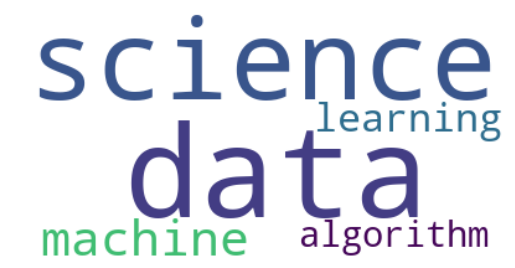

In [24]:
# wordcloud 예제 

from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

# 예시로 0번 토픽의 상위 5개 단어와 가중치가 다음과 같다고 가정
topic_0 = [('data', 0.02), ('science', 0.015), ('machine', 0.012), ('learning', 0.010), ('algorithm', 0.008)]

# dict로 변환하여 워드 클라우드 생성
wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(topic_0))

# 시각화
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

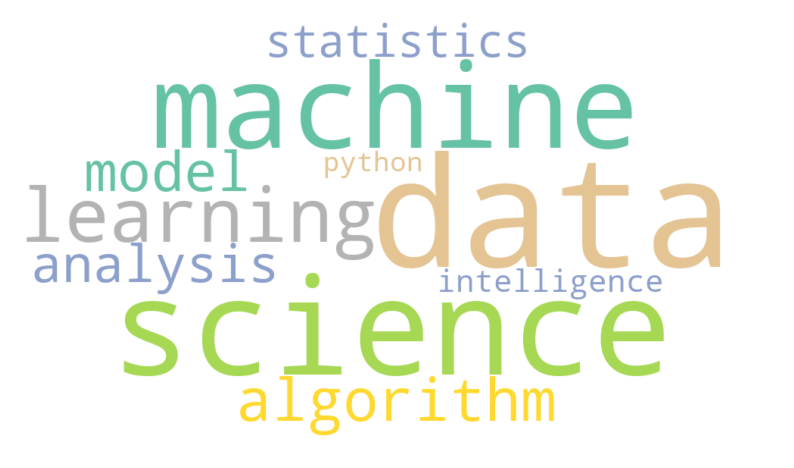

In [25]:
from PIL import Image
import numpy as np 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# 예시로 0번 토픽의 상위 10개 단어와 가중치
topic_0 = [
    ('data', 0.02), ('science', 0.015), ('machine', 0.012),
    ('learning', 0.010), ('algorithm', 0.008), ('model', 0.007),
    ('analysis', 0.006), ('statistics', 0.005), ('intelligence', 0.004),
    ('python', 0.003)
]

# 이미지 불러오고 처리 (배경은 흰색, 글자 모양은 검정색으로 설정)
mask_image = np.array(Image.open("wordcloud_image.png"))

# topic_0 데이터를 이용하여 워드 클라우드 생성
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=123,
    background_color="white",
    colormap="Set2",
    collocations=False, # 단어 조합 포함 여부 
    stopwords=STOPWORDS,
    mask=mask_image
).generate_from_frequencies(dict(topic_0))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


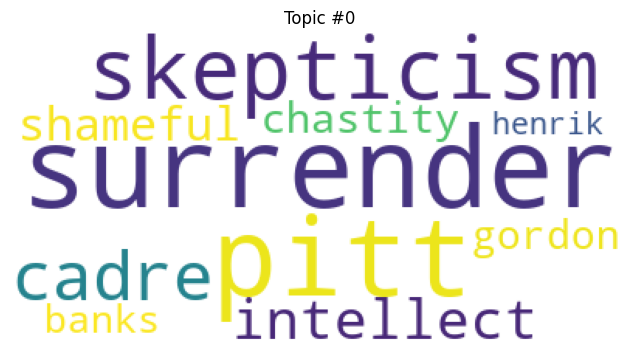

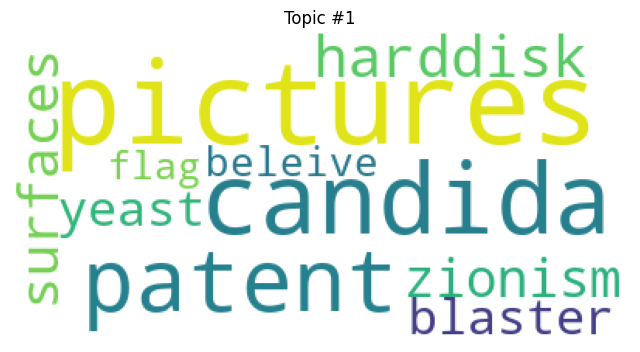

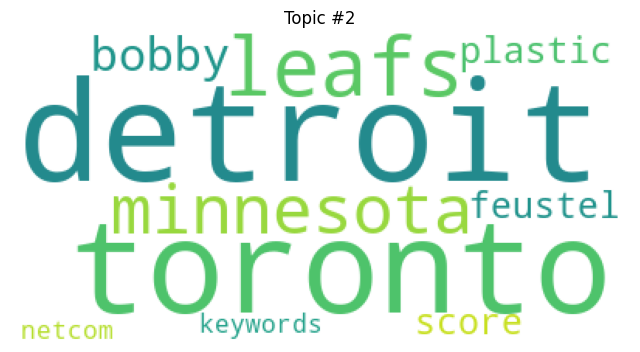

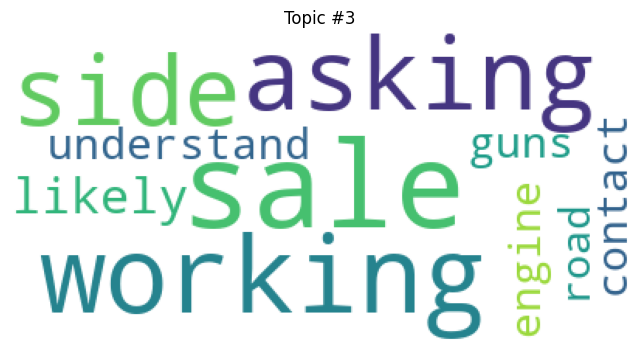

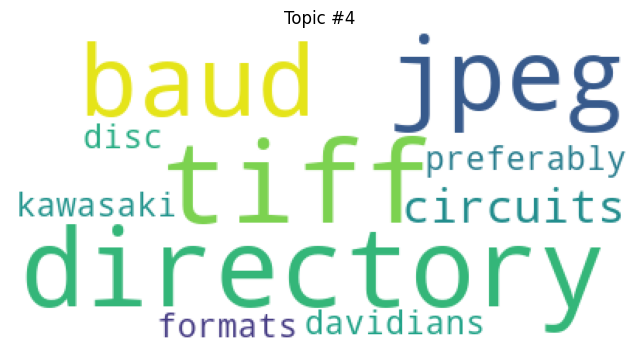

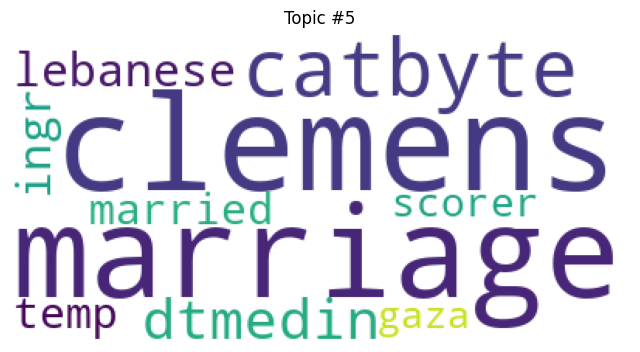

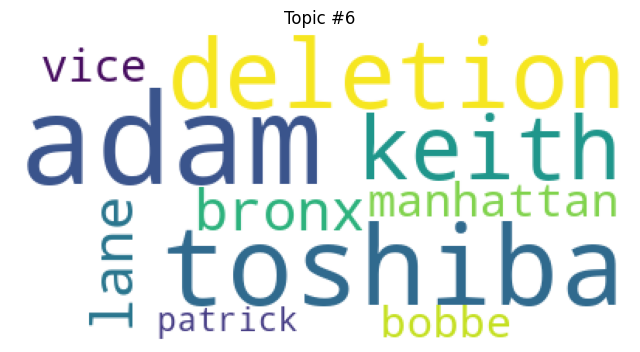

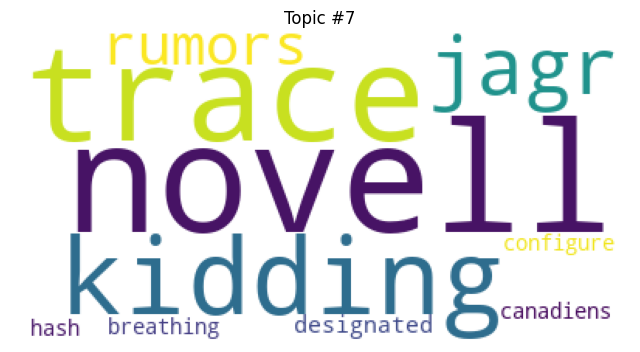

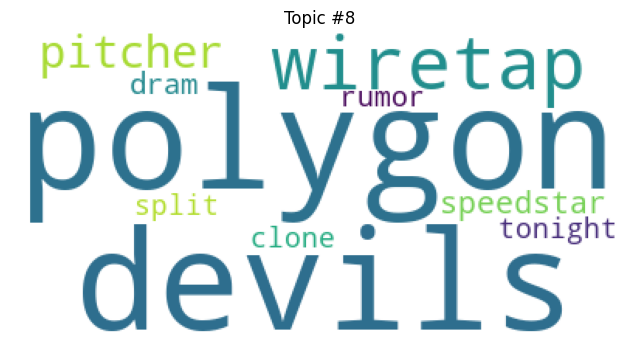

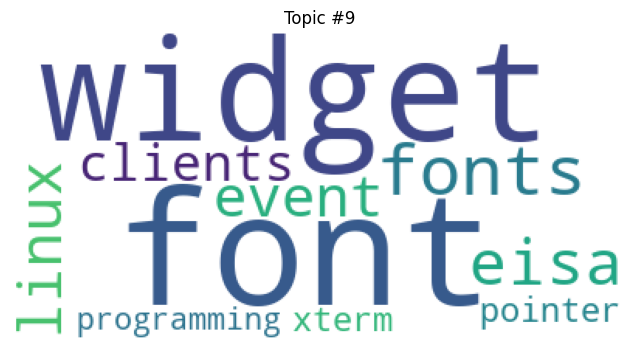

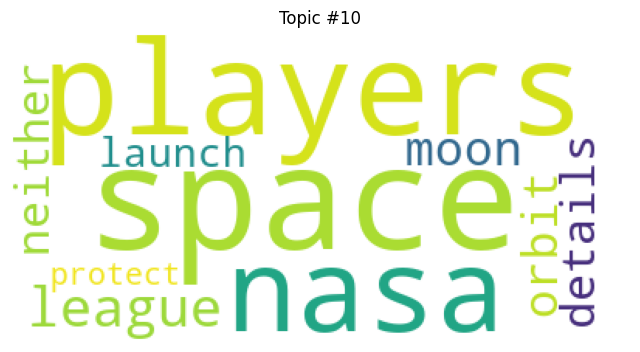

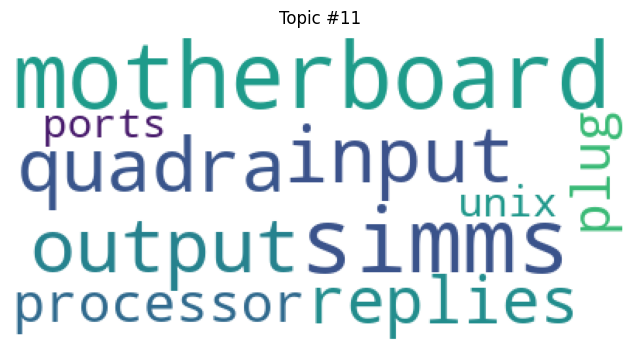

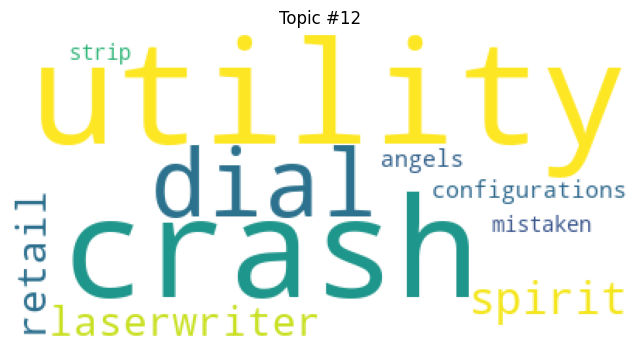

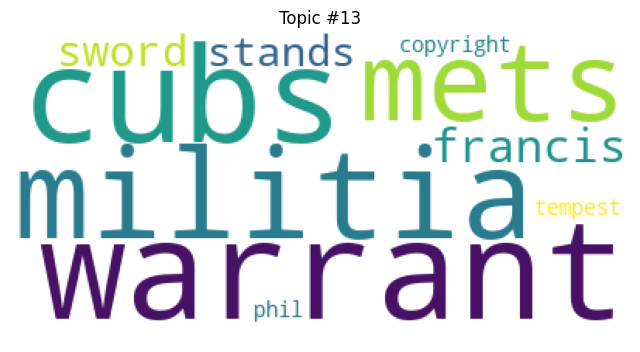

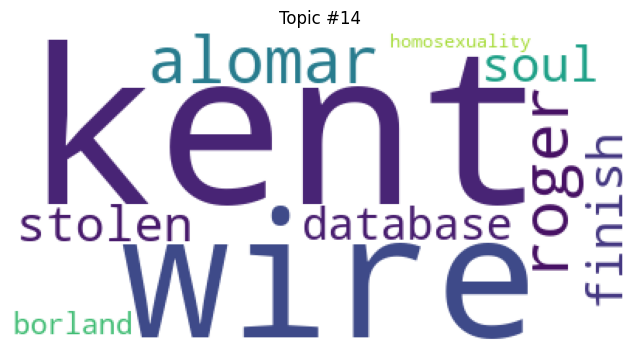

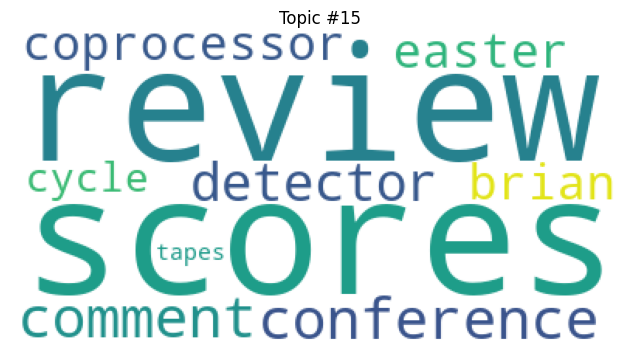

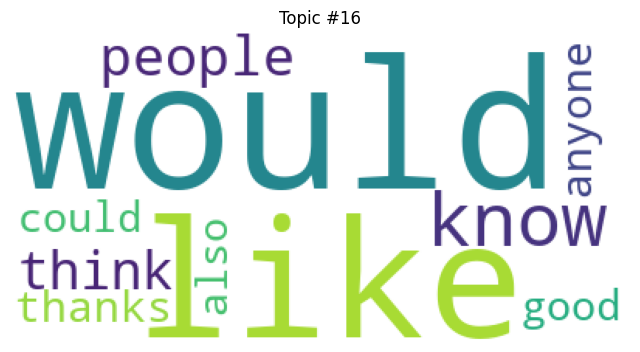

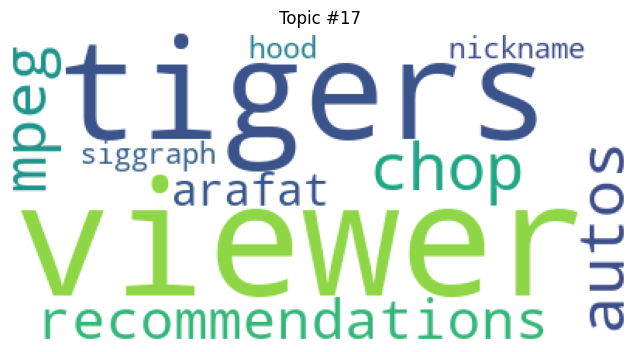

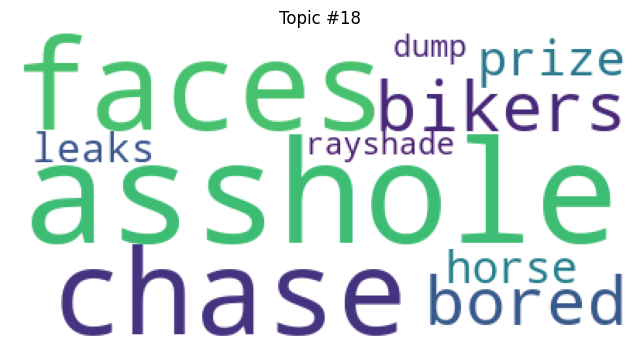

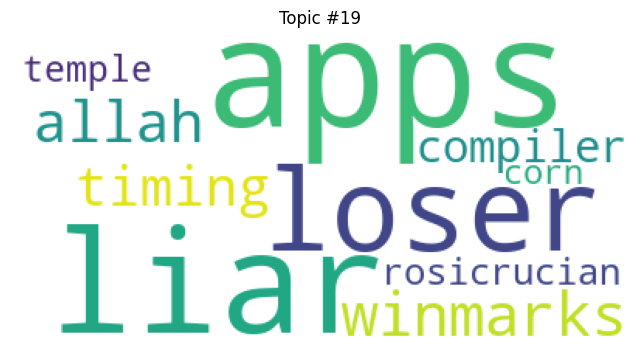

In [30]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

# 토픽별 워드 클라우드 생성 함수
def plot_wordcloud(lda_model, num_topics, num_words=10):
    for t in range(num_topics):
        plt.figure(figsize=(8, 8))
        plt.imshow(WordCloud(background_color='white').generate_from_frequencies(
            dict(lda_model.show_topic(t, num_words)))
        )
        plt.axis("off")
        plt.title(f"Topic #{t}")
        plt.show()

# 워드 클라우드 그리기 (토픽별)
plot_wordcloud(ldamodel_tfidf, NUM_TOPICS, num_words=10)

In [31]:
from collections import defaultdict 
# 전체 토픽에서 단어 가중치 합산하기
word_weights = defaultdict(float)

for topic_id in range(NUM_TOPICS):
    topic = ldamodel_tfidf.show_topic(topic_id, topn=100) 
    for word, weight in topic:
        word_weights[word] += weight # 단어의 가중치 누적


# 전체 토픽 기반 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_weights)

In [32]:
# 전체 토픽에서 단어의 가중치 합산 결과 
word_weights

defaultdict(float,
            {'surrender': 0.0037060603499412537,
             'pitt': 0.0035143818240612745,
             'skepticism': 0.0033944244496524334,
             'cadre': 0.0033934798557311296,
             'intellect': 0.00339080230332911,
             'shameful': 0.003388430457562208,
             'chastity': 0.0033663560170680285,
             'gordon': 0.003227897919714451,
             'banks': 0.0030377646908164024,
             'henrik': 0.0020844151731580496,
             'soon': 0.0019130368018522859,
             'gary': 0.0015450305072590709,
             'brad': 0.0014298897003754973,
             'jeff': 0.0013639603275805712,
             'chinese': 0.0013576819328591228,
             'reaction': 0.0013190904865041375,
             'ordered': 0.001522345992270857,
             'quantum': 0.001283095683902502,
             'width': 0.0012316883075982332,
             'saturday': 0.0012197496835142374,
             'junk': 0.0011534852674230933,
             'm

(-0.5, 799.5, 599.5, -0.5)

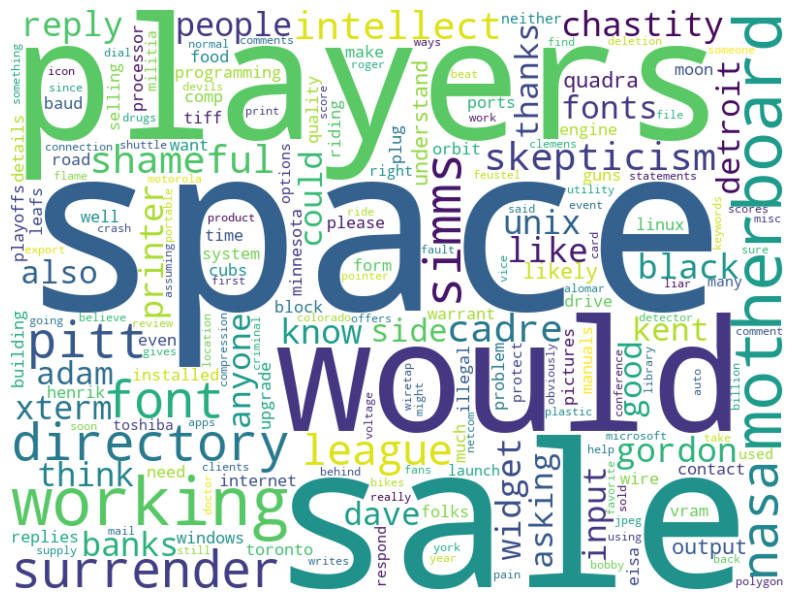

In [33]:
# 워드 클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 7.문서 별 토픽 분포 확인

In [34]:
# 문서별 bow
corpus[1]

[(52, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 2),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 2),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 2),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 2),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1)]

- lda모델에 전체 데이터가 정수 인코딩 된 결과를 넣으면 각 문서별 토픽의 비율을 알 수 있음

In [35]:
len(ldamodel_tfidf[corpus])

11314

- 0번 문서는 4번 토픽, 15번 토픽, 1번 토픽 순서대로 높은 비율을 가짐

In [36]:
ldamodel_tfidf[corpus][0]

[(1, 0.019629426),
 (3, 0.04077289),
 (10, 0.040644687),
 (11, 0.020357504),
 (14, 0.01759348),
 (15, 0.020406224),
 (16, 0.8274874)]

In [38]:
for i, topic_list in enumerate(ldamodel_tfidf[corpus]):
    if i==5:
        break 
    print(i, "번째 문서의 topic 비율: ", sorted(topic_list, key=lambda x:x[1], reverse=True)) # key: 정렬 기준 -> 여기서는 x의 두 번째 요소를 기준으로 정렬

0 번째 문서의 topic 비율:  [(16, 0.82748955), (3, 0.040773015), (10, 0.04064481), (15, 0.020406295), (11, 0.020357572), (1, 0.019628234), (14, 0.017592119)]
1 번째 문서의 topic 비율:  [(16, 0.80319333), (3, 0.058390386), (13, 0.058110707), (1, 0.029429981), (10, 0.029391466)]
2 번째 문서의 topic 비율:  [(16, 0.91013646), (3, 0.073493384)]
3 번째 문서의 topic 비율:  [(16, 0.6737566), (3, 0.29537323), (14, 0.016913388)]
4 번째 문서의 topic 비율:  [(16, 0.4634932), (6, 0.25312796), (10, 0.15554117), (2, 0.0981924)]


# 2.뉴스 기사 제목 데이터 (sklearn)

- [데이터 링크](https://www.kaggle.com/therohk/million-headlines)

## 1.데이터 로드

In [39]:
import pandas as pd
import numpy as np 
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis 

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/19.%20Topic%20Modeling%20(LDA%2C%20BERT-Based)/dataset/abcnews-date-text.csv",
                           "abcnews-date-text.csv")

data = pd.read_csv('abcnews-date-text.csv', on_bad_lines='skip')
print('뉴스 제목 개수 :',len(data))

뉴스 제목 개수 : 1082168


In [41]:
data.head(5)

publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers

- 뉴스 기사 제목만 필요하기 때문에 따로 저장

In [42]:
text = data[['headline_text']]
text

headline_text
0        aba decides against community broadcasting lic...
1           act fire witnesses must be aware of defamation
2           a g calls for infrastructure protection summit
3                 air nz staff in aust strike for pay rise
4            air nz strike to affect australian travellers
...                                                    ...
1082163  when is it ok to compliment a womans smile a g...
1082164                   white house defends trumps tweet
1082165     winter closes in on tasmania as snow ice falls
1082166  womens world cup australia wins despite atapat...
1082167          youtube stunt death foreshadowed by tweet

[1082168 rows x 1 columns]

## 2.데이터 전처리

1. 토큰화
  - axis=1 : 행 단위 적용, 'headline_text'열에 각 행 데이터를 처리

In [ ]:
# nltk.download('punkt')


In [43]:
# nltk.word_toknize()
text['headline_text'] = text['headline_text'].apply(lambda row: nltk.word_tokenize(row))
text.head()

/var/folders/np/0f8tqn_j13l5c_yx0hg3k67r0000gn/T/ipykernel_17395/3607277689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda row: nltk.word_tokenize(row))


headline_text
0  [aba, decides, against, community, broadcastin...
1  [act, fire, witnesses, must, be, aware, of, de...
2  [a, g, calls, for, infrastructure, protection,...
3  [air, nz, staff, in, aust, strike, for, pay, r...
4  [air, nz, strike, to, affect, australian, trav...

2. 표제어 추출
  - WordNetLemmatizer : 표제어 추출 도구로 단어의 기본형을 찾음
  - pos='v' : 해당 단어가 동사(verb)로 간주되어야 함을 의미
  - ["running", "jumps", "eats"] -> `["run", "jump", "eat"]`로 변환


In [44]:
# nltk.download('wordnet')
# WordNetLemmatizer().lemmatize()

text['headline_text'] = text['headline_text'].apply(lambda row: [WordNetLemmatizer().lemmatize(word, pos='v') for word in row])
display(text.head())


/var/folders/np/0f8tqn_j13l5c_yx0hg3k67r0000gn/T/ipykernel_17395/1231276514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda row: [WordNetLemmatizer().lemmatize(word, pos='v') for word in row])


headline_text
0  [aba, decide, against, community, broadcast, l...
1  [act, fire, witness, must, be, aware, of, defa...
2  [a, g, call, for, infrastructure, protection, ...
3  [air, nz, staff, in, aust, strike, for, pay, r...
4  [air, nz, strike, to, affect, australian, trav...

3. 길이가 3이하인 단어 제거

In [45]:
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])
display(tokenized_doc[:5])

0    [decide, against, community, broadcast, licence]
1            [fire, witness, must, aware, defamation]
2          [call, infrastructure, protection, summit]
3                         [staff, aust, strike, rise]
4            [strike, affect, australian, travellers]
Name: headline_text, dtype: object

## 3.TF-IDF 벡터화

In [46]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

# 다시 text['headline_text']에 재저장
text['headline_text'] = detokenized_doc

/var/folders/np/0f8tqn_j13l5c_yx0hg3k67r0000gn/T/ipykernel_17395/876560129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = detokenized_doc


In [47]:
text['headline_text'][:5]

0    decide against community broadcast licence
1            fire witness must aware defamation
2         call infrastructure protection summit
3                        staff aust strike rise
4           strike affect australian travellers
Name: headline_text, dtype: object

In [48]:
# 상위 1,000개의 단어를 보존
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text['headline_text'])

# TF-IDF 행렬의 크기 확인
print(X.shape)


(1082168, 1000)


## 4.토픽 모델링

- n_components=10:
  - 추출할 토픽의 수를 지정. 여기서는 10개의 주제를 추출하도록 설정되어 있음.

- learning_method='online'
  - LDA의 학습 방법을 설정하는 옵션입니다. Scikit-learn에서는 batch와 online 두 가지 학습 방법을 지원.
    - online: 확률적 그라디언트 디센트를 사용한 점진적 학습을 수행. 대규모 데이터셋을 처리할 때 메모리 효율이 좋음.
    - batch: 전체 데이터를 한꺼번에 사용하여 LDA를 학습.

- random_state=777
  - 난수 시드를 고정하는 설정. LDA는 확률적 모델이기 때문에 학습할 때마다 결과가 달라질 수 있음. 난수 시드를 고정하여 실험을 재현 가능하게 함.

- max_iter=1
  - 최대 반복 횟수. LDA 모델이 수렴할 때까지 데이터셋을 몇 번 반복하여 학습할지를 결정.
  - 값이 클수록 더 많은 반복을 통해 더 정교한 모델을 얻을 수 있지만, 시간이 더 많이 소요됨. 기본값은 10.

In [49]:
# 모델 정의
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)

# 모델 학습
lda_top = lda_model.fit_transform(X)

In [51]:
lda_top.shape

(1082168, 10)

In [52]:
lda_top[0] # 문서별 토픽 분포 

array([0.48500584, 0.03669227, 0.03669227, 0.03669227, 0.22145597,
       0.03669227, 0.03669227, 0.03669227, 0.03669227, 0.03669227])

- shape : 토픽의 수 x 단어의 수

In [53]:
print(lda_model.components_.shape)
print(lda_model.components_) # 토픽별 단어 분포(중요도) 


(10, 1000)
[[1.00000780e-01 1.00001543e-01 3.50266988e+03 ... 1.00005123e-01
  1.00002149e-01 7.53489542e+02]
 [1.00001645e-01 1.13510390e+03 1.00010686e-01 ... 1.00007423e-01
  1.00002446e-01 1.00002745e-01]
 [1.00001286e-01 1.00000631e-01 1.00001259e-01 ... 1.00004282e-01
  1.00004499e-01 1.00002524e-01]
 ...
 [1.00002089e-01 1.00001892e-01 1.00007360e-01 ... 1.00008910e-01
  1.00001329e-01 1.00004704e-01]
 [1.00002792e-01 1.00000874e-01 1.00003418e-01 ... 1.00004359e-01
  1.00002129e-01 1.00006227e-01]
 [1.00002486e-01 1.00002259e-01 1.00011643e-01 ... 1.00004542e-01
  1.00002326e-01 1.00004916e-01]]


In [ ]:
# 단어 집합. 1,000개의 단어가 저장됨.



## 5.시각화

In [ ]:
# ! pip install pyLDAvis==3.2.2

In [ ]:


# TF-IDF 벡터화된 단어 목록을 추출


# 각 문서의 길이를 올바르게 계산 (TF-IDF 값들의 합으로 계산)


# 전체 단어 빈도를 올바르게 계산 (TF-IDF 행렬을 통해 계산)


# LDA 시각화


# pyLDAvis에 맞게 데이터 준비


# 시각화

